# Experimento 7 : Test te results

## Load the CBNs and show his topologies

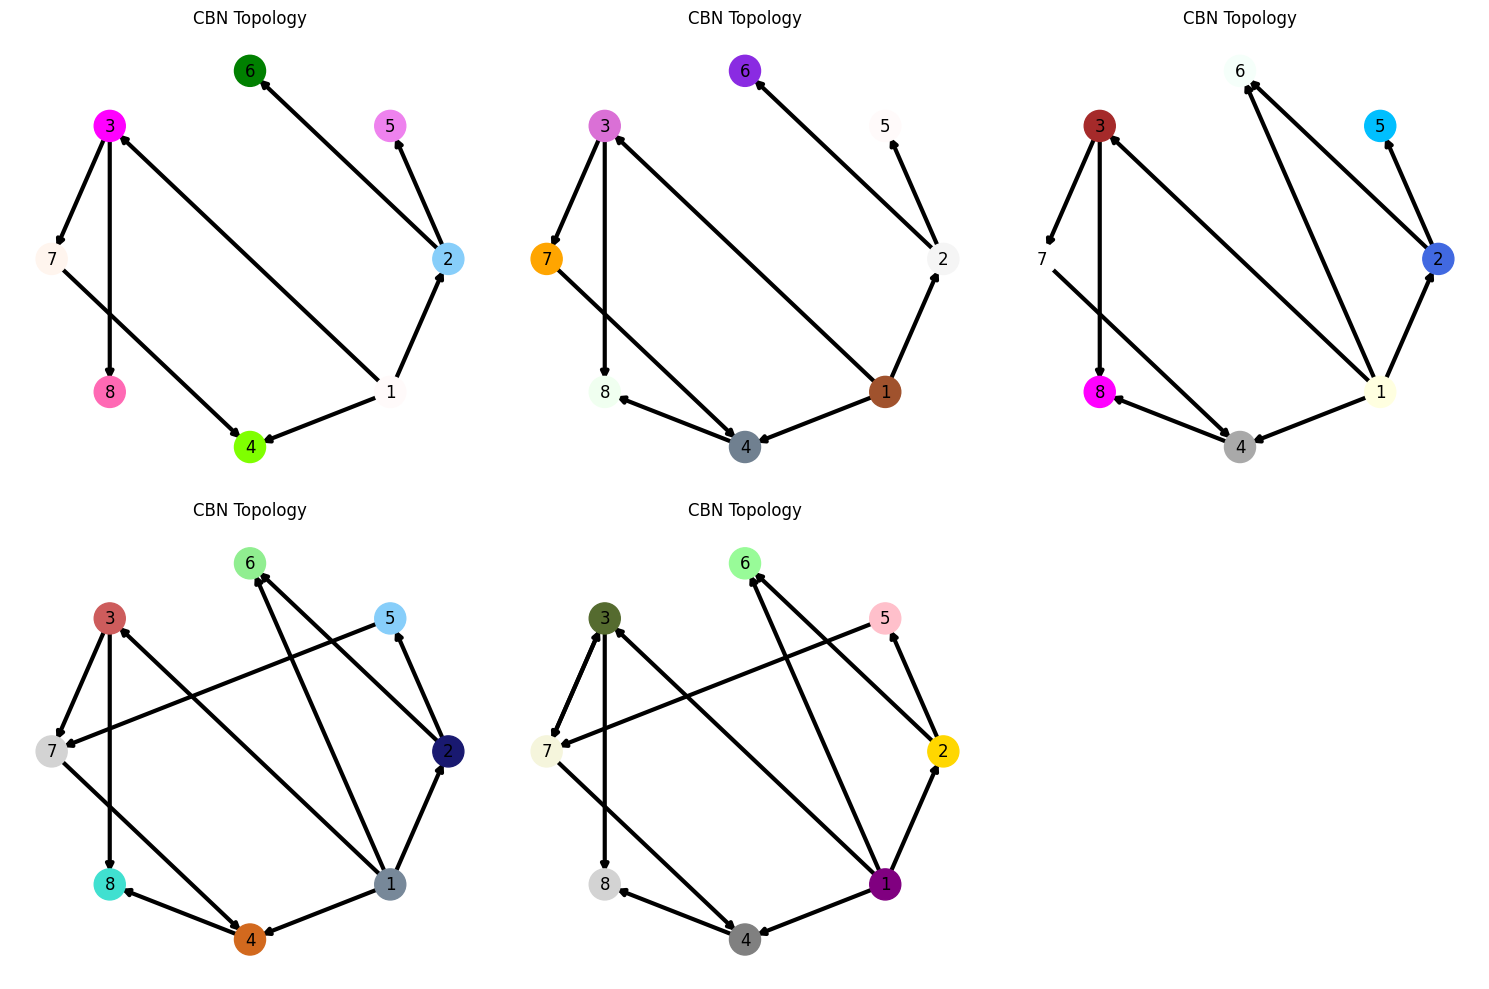

In [7]:
import pickle
import os
import matplotlib.pyplot as plt

# Define el segundo número en la ruta del archivo pickle
i_sample = 3
n_networks = 8

# Ruta base sin el número cambiante
base_path_cbn = f'outputs/exp7_data_7_8_100/pkl_cbn/cbn_{i_sample}_{n_networks}_'

# Número inicial y rango máximo
start_number = n_networks
max_number = 2 * start_number

# Lista de archivos pickle existentes
pickle_files = [f"{base_path_cbn}{i}.pkl" for i in range(start_number, max_number + 1) if os.path.exists(f"{base_path_cbn}{i}.pkl")]

# Número total de gráficos
total_graphs = len(pickle_files)

# Configuración de subplots en múltiples filas y columnas
cols = 3
rows = (total_graphs + cols - 1) // cols  # Calcula el número de filas necesario

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Aplanar la matriz de ejes si hay más de una fila
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Mostrar la información de CBN en el subplot correspondiente
    o_cbn.plot_topology(ax=ax)  # Asegúrate de que plot_topology acepte un parámetro ax

# Eliminar ejes vacíos si hay menos gráficos que espacios de subplots
for ax in axes[total_graphs:]:
    fig.delaxes(ax)

# Ajustar el layout y mostrar todas las gráficas juntas
plt.tight_layout()
plt.show()
                

## Show the indicators by sample

In [8]:
# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        print(30*'-')
        o_cbn = pickle.load(file)
        # o_cbn.show_description()
        print('Local Attractors:',len(o_cbn.l_directed_edges), "->", len(o_cbn.d_local_attractors))
        print('Attractor Pairs:',len(o_cbn.l_directed_edges), "->", o_cbn.get_n_pair_attractors())
        print('Attractor Fields',len(o_cbn.l_directed_edges), "->", o_cbn.get_n_attractor_fields())

------------------------------
Local Attractors: 8 -> 17
Attractor Pairs: 8 -> 6
Attractor Fields 8 -> 0
------------------------------
Local Attractors: 9 -> 19
Attractor Pairs: 9 -> 9
Attractor Fields 9 -> 0
------------------------------
Local Attractors: 10 -> 21
Attractor Pairs: 10 -> 10
Attractor Fields 10 -> 0
------------------------------
Local Attractors: 11 -> 23
Attractor Pairs: 11 -> 13
Attractor Fields 11 -> 0
------------------------------
Local Attractors: 12 -> 25
Attractor Pairs: 12 -> 15
Attractor Fields 12 -> 0


## Save the CBNs description for Analysis

In [9]:
import contextlib
import io

# Crear la carpeta de descripción si no existe
description_folder = 'description'
os.makedirs(description_folder, exist_ok=True)

# Función para extraer el índice del archivo pickle
def extract_index(file_path):
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    return file_name.split('_')[-1]

# Iterador para cargar y guardar las descripciones
for path_cbn in pickle_files:
    idx = extract_index(path_cbn)
    
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Capturar la salida de o_cbn.show_description()
    description = io.StringIO()
    with contextlib.redirect_stdout(description):
        o_cbn.show_description()
    
    # Guardar la descripción en un archivo de texto
    description_file_path = os.path.join(description_folder, f'description_{idx}.txt')
    with open(description_file_path, 'w') as desc_file:
        desc_file.write(description.getvalue())

print("Descripciones guardadas en la carpeta 'description'.")

Descripciones guardadas en la carpeta 'description'.
